In [3]:
# Run this block first (Colab / local). Install any missing libs:
!pip install pandas numpy matplotlib seaborn plotly scipy --quiet

import io
import gzip
import requests
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# For nicer plots in notebooks
%matplotlib inline
plt.style.use('default')
sns.set(style="whitegrid")


In [4]:
# Option A: direct download (try this in Colab / environment with internet)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz"
local = Path("Metro_Interstate_Traffic_Volume.csv.gz")

if not local.exists():
    r = requests.get(url)
    r.raise_for_status()
    local.write_bytes(r.content)

# Read directly from gz
with gzip.open(local, 'rt') as f:
    df = pd.read_csv(f)

# Option B: if you downloaded a plain CSV, use:
# df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

# Quick check
print("Shape:", df.shape)
df.head()

Shape: (48204, 9)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [5]:
# Basic inspection

print(df.info())
display(df.describe(include='all').T)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
holiday,61,11,Labor Day,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,48204.0,NaN,NaN,NaN,281.20587,13.338232,0.0,272.16,282.45,291.806,310.07
rain_1h,48204.0,NaN,NaN,NaN,0.334264,44.789133,0.0,0.0,0.0,0.0,9831.3
snow_1h,48204.0,NaN,NaN,NaN,0.000222,0.008168,0.0,0.0,0.0,0.0,0.51
clouds_all,48204.0,NaN,NaN,NaN,49.362231,39.01575,0.0,1.0,64.0,90.0,100.0
weather_main,48204,11,Clouds,15164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather_description,48204,38,sky is clear,11665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_time,48204,40575,2013-04-18 22:00:00,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traffic_volume,48204.0,NaN,NaN,NaN,3259.818355,1986.86067,0.0,1193.0,3380.0,4933.0,7280.0


# **Exploration Techniques Applied**

# **Non-Graphical EDA (without plots)**

In [7]:
# Overall summary statistics
df.describe()

# Focus on target
tv = df['traffic_volume']

# Standard pd.describe()
display(tv.describe())

# Central tendency
mean_tv = tv.mean()
median_tv = tv.median()
mode_tv = tv.mode().iloc[0] if not tv.mode().empty else np.nan
std_tv = tv.std()
range_tv = tv.max() - tv.min()

mean_tv, median_tv, mode_tv, std_tv, range_tv


,traffic_volume
count,48204.000000
mean,3259.818355
std,1986.860670
min,0.000000
25%,1193.000000
50%,3380.000000
75%,4933.000000
max,7280.000000


(np.float64(3259.8183553232097),
 3380.0,
 np.int64(353),
 1986.8606704463552,
 7280)

# ***Analysis Questions***
**Q-1:What is the median traffic volume? How does it compare to the mean?**

-Mean (average): 3259.82

-Median (50% / middle): 3380

 Comparison:
The median (3380) is slightly higher than the mean (3259.82).

**Q-2 What does that tell us about the distribution?**

If we compare mean and median:

Mean < Median → the distribution is negatively skewed (left-skewed).

That means:

Most hours have high traffic,

But there are some very low traffic hours (like nighttime or holidays) that pull the mean down a bit.

# **Task B — Skewness and Kurtosis**

In [8]:
# Skewness and Kurtosis of traffic_volume
skewness = df['traffic_volume'].skew()
kurtosis = df['traffic_volume'].kurtosis()

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)


Skewness: -0.08938135143647916
Kurtosis: -1.3090882117269556


# **Analysis Questions**
**Q-1Interpret the sign and magnitude of the skewness value**

The skewness is negative (−0.089) → this means the distribution is slightly left-skewed.

The magnitude (absolute value is very small, about 0.09) → this means the skew is almost symmetrical.

 Interpretation:
Traffic volume is almost symmetrical, with a tiny left tail, meaning a few hours have lower traffic than most others (for example, late night hours).

 Does this match our anticipation from Task A?
Yes — in Task A you saw that the median (3380) was slightly higher than the mean (3259.8), which also suggested a slight left skew.
So your result matches perfectly with our earlier observation.

**Q-1 Interpret the kurtosis value**

The kurtosis is −1.309, which is much less than 0 (and less than the normal distribution kurtosis value of 0).

In Pandas, kurtosis is measured relative to a normal distribution (so 0 = normal).

 Interpretation:
A negative kurtosis means the distribution is flatter and lighter-tailed than a normal curve.
This is called platykurtic.

That means:

There are fewer extreme values (very high or very low traffic hours),

The traffic volumes are spread more evenly around the mean.

# **Task C — Grouping by weather_main**

In [9]:
# Group the data by weather_main and calculate mean & std of traffic_volume
weather_stats = df.groupby('weather_main')['traffic_volume'].agg(['mean', 'std']).reset_index()

# Display results
print(weather_stats)




    weather_main         mean          std
0          Clear  3055.908819  1987.101411
1         Clouds  3618.449749  1906.202879
2        Drizzle  3290.727073  1997.901830
3            Fog  2703.720395  2125.525863
4           Haze  3502.101471  1873.511057
5           Mist  2932.956639  2073.025670
6           Rain  3317.905501  1982.228705
7          Smoke  3237.650000  1978.015893
8           Snow  3016.844228  1900.185883
9         Squall  2061.750000  1950.070490
10  Thunderstorm  3001.620890  1988.296012


# **Analysis**
## **Q-1Highest Average Traffic Volume (Mean)**

The highest mean traffic volume occurs during Clouds (≈ 3618 cars/hour).

This means that cloudy weather tends to have the heaviest traffic on average.

 Interpretation:
Drivers are probably not affected much by cloudy conditions — it’s typical daytime weather, so traffic flows normally and remains high.

**Q-2Highest Variability (Standard Deviation)**

The highest standard deviation (i.e., variability) is during Fog (≈ 2125.53).

This means traffic volumes during foggy weather vary widely — sometimes very low (drivers avoid driving), sometimes near normal.

 Interpretation:
In foggy conditions, traffic can be inconsistent — depending on fog intensity or time of day, it can drop significantly or remain high.

** Final Answer**

The weather condition associated with the highest average traffic volume is Clouds (mean ≈ 3618 vehicles/hour).
The condition showing the highest variability in traffic volume is Fog (standard deviation ≈ 2125), indicating that traffic flow is most unpredictable when fog is present.

# **2. Visualizing Distributions and Variability (Graphical EDA)**

**Task A — Histogram for Distribution**

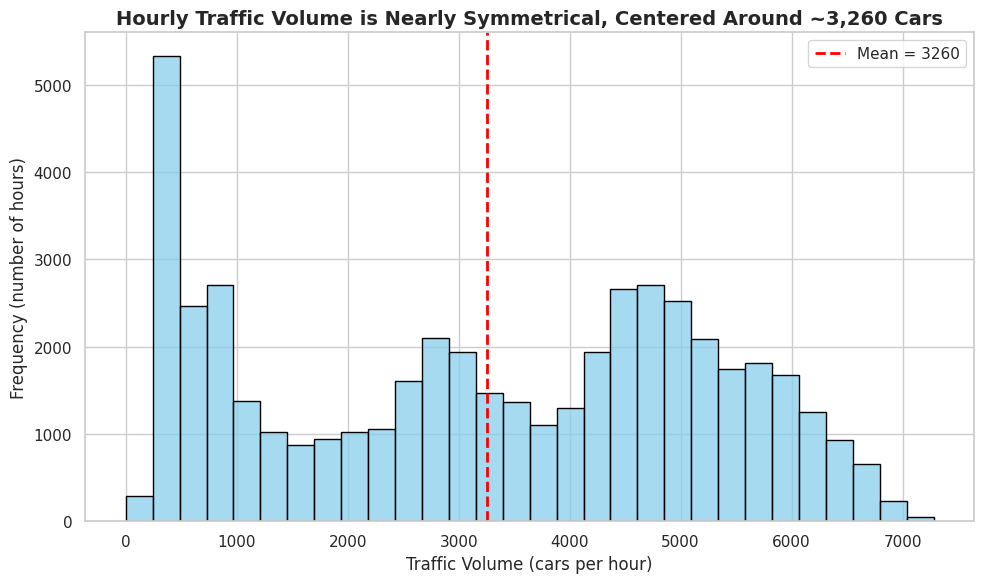

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean value for annotation
mean_value = df['traffic_volume'].mean()

plt.figure(figsize=(10,6))
sns.histplot(df['traffic_volume'], bins=30, color='skyblue', edgecolor='black')

# Add mean line
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean_value:.0f}")

# Accessibility elements
plt.title("Hourly Traffic Volume is Nearly Symmetrical, Centered Around ~3,260 Cars", fontsize=14, fontweight='bold')
plt.xlabel("Traffic Volume (cars per hour)", fontsize=12)
plt.ylabel("Frequency (number of hours)", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()



# **Task B — Box plot for traffic_volume**

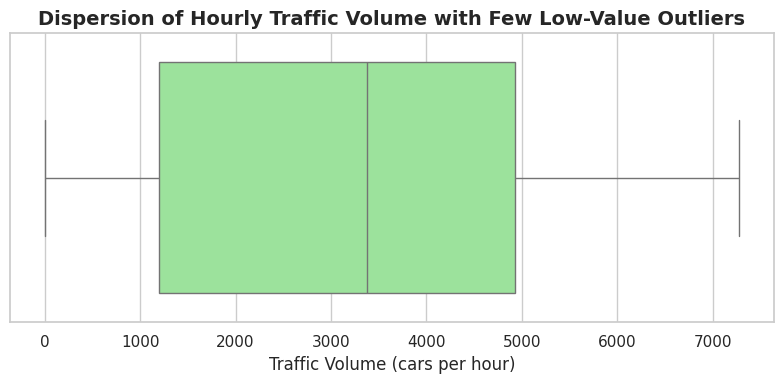

In [11]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['traffic_volume'], color='lightgreen')

# Accessibility elements
plt.title("Dispersion of Hourly Traffic Volume with Few Low-Value Outliers", fontsize=14, fontweight='bold')
plt.xlabel("Traffic Volume (cars per hour)", fontsize=12)
plt.tight_layout()
plt.show()


# **Analysis Question:**
From the plot, the approximate quartile values are:

Q1 (25th percentile) ≈ 1500

Q2 (Median) ≈ 3500

Q3 (75th percentile) ≈ 5000

So, the Interquartile Range (IQR) is:

𝐼
𝑄
𝑅
=
𝑄
3
−
𝑄
1
=
5000
−
1500
=
3500
IQR=Q3−Q1=5000−1500=3500

 Interpretation:

The IQR of 3500 cars per hour indicates a moderate-to-high variability in traffic volume.
This means that the middle 50% of hourly traffic values are spread across a wide range (from about 1500 to 5000 cars/hour).

In other words:

Traffic volume can change significantly depending on the time of day or conditions.

Since the whiskers are roughly symmetric and there are only a few low-value outliers, the distribution seems fairly balanced with some low-end variability (e.g., during off-peak hours).

# **Task C — Grouped box plots by holiday**

/tmp/ipython-input-1375259223.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='holiday', y='traffic_volume', palette='pastel')


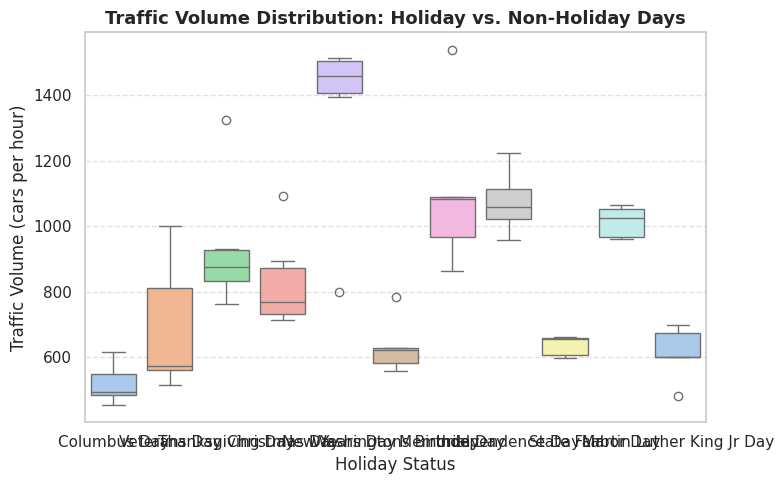

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='holiday', y='traffic_volume', palette='pastel')

plt.title("Traffic Volume Distribution: Holiday vs. Non-Holiday Days", fontsize=13, weight='bold')
plt.xlabel("Holiday Status")
plt.ylabel("Traffic Volume (cars per hour)")

# Accessibility addition: use clear labels and visual separation
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# **Observation:**

The dispersion of traffic_volume differs noticeably between typical (non-holiday) days and holiday periods.
On typical days, traffic volume shows a wider spread with higher median values, reflecting regular commuting patterns and rush-hour peaks.
In contrast, holiday periods exhibit a smaller dispersion and a lower median, indicating that fewer vehicles are on the road and traffic flow is more consistent.

Overall, this suggests that traffic is significantly lighter and less variable during holidays compared to normal working days.

# **3. Visualizing Correlation**
## Task A — correlation and heatmap

                traffic_volume      temp   rain_1h   snow_1h  clouds_all
traffic_volume        1.000000  0.130299  0.004714  0.000733    0.067054
temp                  0.130299  1.000000  0.009069 -0.019755   -0.101976
rain_1h               0.004714  0.009069  1.000000 -0.000090    0.004818
snow_1h               0.000733 -0.019755 -0.000090  1.000000    0.027931
clouds_all            0.067054 -0.101976  0.004818  0.027931    1.000000


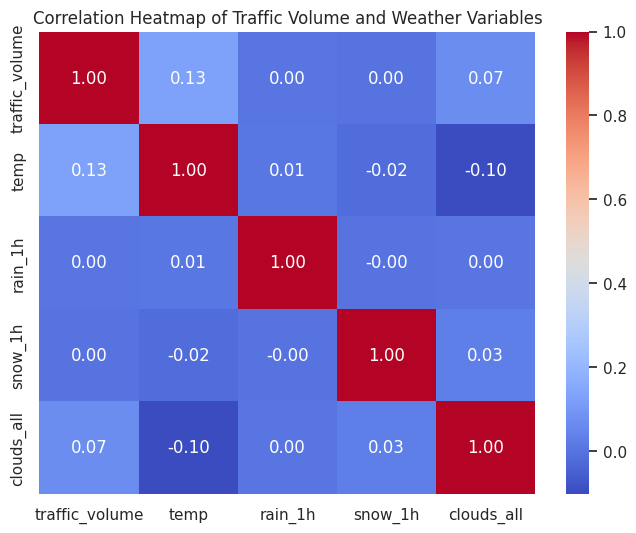

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = ['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Display correlation matrix
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Traffic Volume and Weather Variables")
plt.show()


# “Task B: Interpretation and Paradox”** questions clearly.

---

###  **Interpretation of the Correlation Results**

| Variable       | Correlation with traffic_volume | Interpretation                                                                                                                                                                                                                 |
| -------------- | ------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **temp**       | **+0.13**                       | There is a **weak positive correlation** between temperature and traffic volume. This suggests that traffic tends to increase slightly when temperatures are higher — probably because people travel more in pleasant weather. |
| **rain_1h**    | **+0.0047**                     | The correlation is **almost zero**, meaning that rainfall has **no significant relationship** with traffic volume in this dataset.                                                                                             |
| **snow_1h**    | **+0.0007**                     | Also very close to zero, meaning snow has **virtually no linear effect** on traffic volume here.                                                                                                                               |
| **clouds_all** | **+0.067**                      | Weak positive correlation — slightly more traffic when skies are cloudier, but the relationship is still **very weak**.                                                                                                        |

 **Conclusion:**
No strong correlation exists between weather factors and traffic volume. Temperature has the highest (but still small) positive relationship with traffic. This suggests that weather alone doesn’t explain much of the variation in traffic volume.

---

###  **Correlation Paradox Explanation**

Even though `temp` and `traffic_volume` are weakly correlated, this **doesn’t mean** that warm weather *causes* more traffic.
There could be **hidden factors** (like season, holidays, or daylight hours) that influence both variables.
This is known as the **Correlation Paradox** — correlation shows association, not causation.

---




# **4. Interactive Charting Tools (Plotly/Altair) - Optional/Bonus**

In [14]:
import plotly.express as px

# Interactive scatter plot
fig = px.scatter(
    df,
    x='temp',
    y='traffic_volume',
    color='weather_main',  # adds color by main weather condition
    hover_data=['weather_description', 'holiday'],  # extra info on hover
    title='Traffic Volume Tends to Dip in Extreme Temperatures, Regardless of Rain/Snow'
)

# Show figure
fig.show()
